In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
from scipy.linalg import solve # Более прямой импорт solve

# Лабораторная работа 2

## Жёсткие системы ОДУ

- Решение системы ОДУ явным методом Адамса 4 порядка
- Решение системы ОДУ неявным методом Рунге-Кутты 4 порядка
- Решение системы ОДУ неявным методом Адамса 3 порядка
- Решение системы ОДУ методами Розенброка-Ванера 2 и 3 порядков

### Математическая модель свёртывания крови
$\begin{align}
    \begin{cases}
        \frac{d\theta}{dt} = \frac{\alpha \cdot \theta^2}{\theta + \theta_0} - \kappa_1 \cdot \theta - \gamma \cdot \theta \cdot \varphi; \\
        \frac{d\varphi}{dt} = \beta \cdot \theta \cdot \left(1 - \frac{\varphi}{C}\right) \cdot \left(1 + \left(\frac{\varphi}{\varphi_0}\right)^2\right) - \kappa_2 \cdot \varphi
    \end{cases}
\end{align}$

### Характерные значения параметров точечной модели:


| $\alpha$, мин$^{-1}$ | $\beta$, мин$^{-1}$ | $\gamma$, мин$^{-1}$ нМ$^{-1}$ | $\theta_0$, нМ | $\varphi_0$, нМ | $C$, нМ | $\kappa_1$, мин$^{-1}$ | $\kappa_2$, мин$^{-1}$ |
|------------|-----------|------------|-------------|--------------|-------|--------------|--------------|
| 2.0        | 0.0015    | 5.0        | 3.0         | 0.0525       | 5.0   | 0.05         | 0.35         |

# Явный метод Адамса 4 порядка

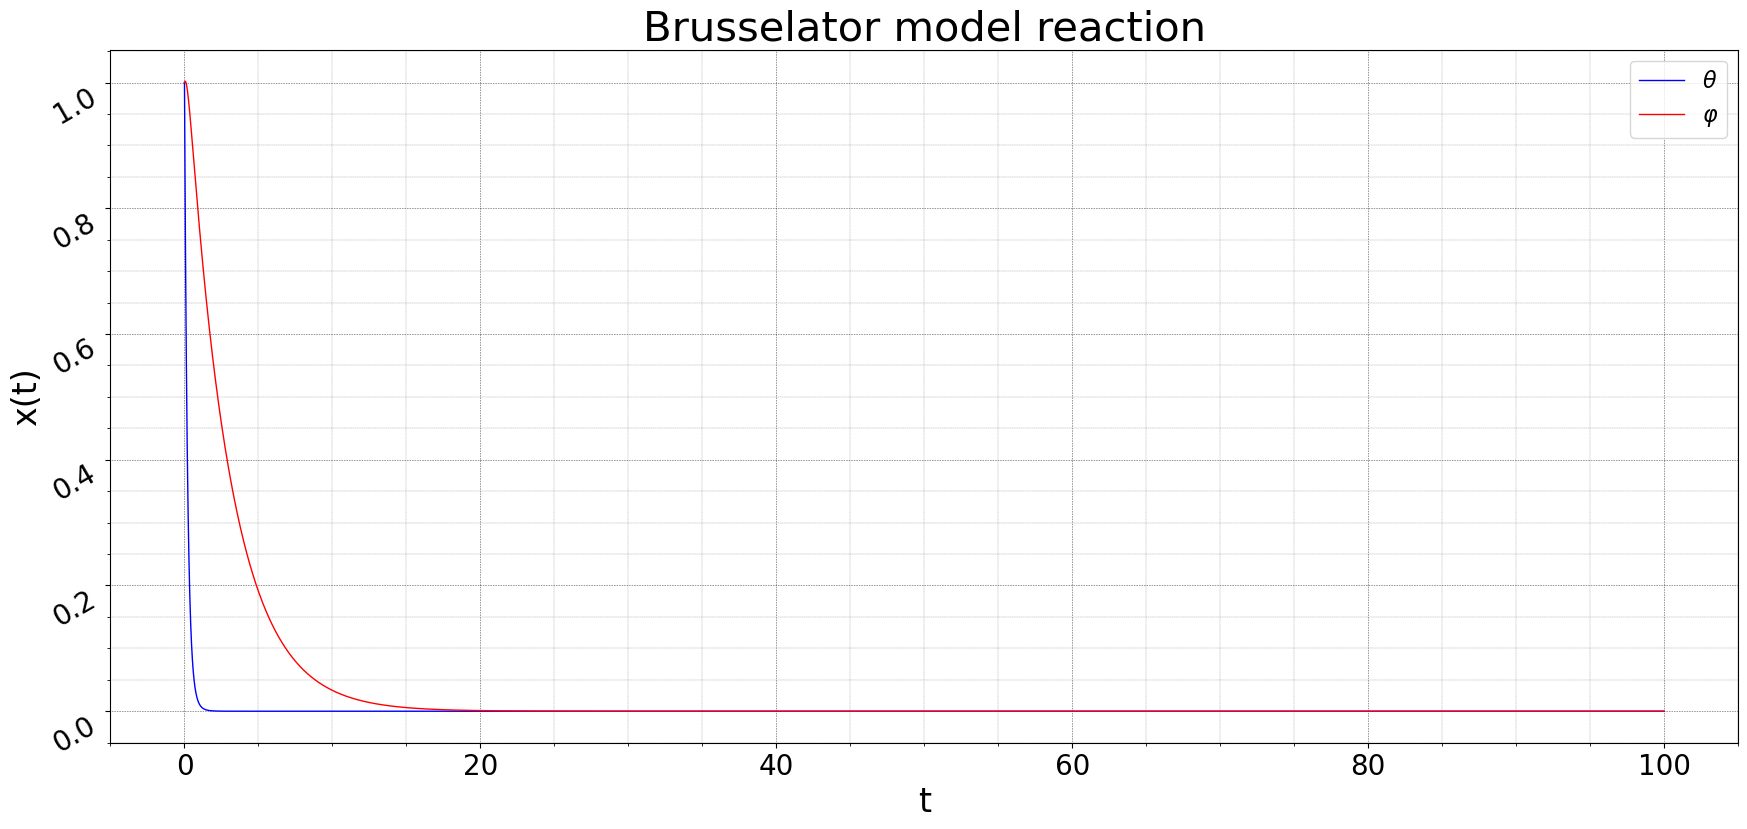

In [4]:
def Runge_Kutta(f, x_0, t_1, t_2, N, a, b, c):
    # Time vector
    t = np.linspace(t_1, t_2, num=(N+1), endpoint=True)
    # Time step
    dt = (t_2 - t_1) / N

    # Initialize steps vector
    dim = len(x_0)
    x = np.zeros(shape=(N+1, dim))
    x[0] = x_0
    
    # Runge-Kutta method implication
    order = len(b) # Method order
    k = np.zeros(shape=(order, dim))

    for n in range(N):
        for i in range(order):
            k[i] = f(t[n] + dt * c[i], x[n] + dt * sum([a[i][j] * k[j] for j in range(i)]))
        x[n+1] = x[n] + dt * sum([b[j] * k[j] for j in range(order)])

    return t, x.T


def Adams(F, x_0, t_1, t_2, N, order):
    # Time vector
    t = np.linspace(t_1, t_2, num=(N+1), endpoint=True)
    # Time step
    dt = (t_2 - t_1) / N

    # Initialize x and f vectors
    dim = len(x_0[0])
    x = np.zeros(shape=(N+1, dim))
    f = np.zeros(shape=(N+1, dim))
    for i in range(order):
        x[i] = x_0[i]
        f[i] = F(t[i], x_0[i])

    # Adams method implication
    if order == 2:
        for n in range(order, N+1):
            x[n] = x[n-1] + (dt / 2) * (3 * f[n-1] - f[n-2])
            f[n] = F(t[n], x[n])
    elif order == 3:
        for n in range(order, N+1):
            x[n] = x[n-1] + (dt / 12) * (23 * f[n-1] - 16 * f[n-2] + 5 * f[n-3])
            f[n] = F(t[n], x[n])
    elif order == 4:
        for n in range(order-1, N+1):
            x[n] = x[n-1] + (dt / 24) * (55 * f[n-1] - 59 * f[n-2] + 37 * f[n-3] - 9 * f[n-4])
            f[n] = F(t[n], x[n])
    else:
        raise RuntimeError("The order has to be 2, 3 or 4")

    return t, x.T


def draw(t, x):
    plt.figure(figsize = (21, 9), dpi = 100)
    plt.title("Brusselator model reaction", fontsize = 30)

    plt.xlabel("t", fontsize = 24)
    plt.xticks(fontsize =  20, ha = "center", va = "top")

    plt.ylabel("x(t)", fontsize = 24)
    plt.yticks(fontsize = 20, rotation = 30, ha = "right", va = "top")

    plt.plot(t, x[0], linewidth = 1, color = "blue", label = r"$\theta$")
    plt.plot(t, x[1], linewidth = 1, color = "red", label = r"$\varphi$")
    

    plt.legend(loc='best', fontsize=16)

    plt.grid (color="black", linewidth=0.45, linestyle="dotted")
    plt.minorticks_on()
    plt.grid (which="minor", color="grey", linewidth=0.25, linestyle="dashed")

    plt.show()


x_0 = [1, 1]
t_1 = 0
t_2 = 100
N = 100000
alpha = 2.0
beta = 0.0015
gamma = 5.0
theta_0 = 3.0
phi_0 = 0.0525
C = 5.0
kappa_1 = 0.05
kappa_2 = 0.35

a = [[0.0, 0.0, 0.0, 0.0],
     [0.5, 0.0, 0.0, 0.0],
     [0.0, 0.5, 0.0, 0.0],
     [0.0, 0.0, 1.0, 0.0]]
b = np.array([1.0/6.0, 1.0/3.0, 1.0/3.0, 1.0/6.0])
c = np.array([0.0, 0.5, 0.5, 1.0])

f = lambda t, x: np.array([((alpha * x[0]**2) / (x[0] + theta_0)) - kappa_1 * x[0] - gamma * x[0] * x[1], beta * x[0] * (1 - (x[1]/C)) * (1 + (x[1]/phi_0)**2) - kappa_2 * x[1]])
_, x = Runge_Kutta(f, x_0, t_1, t_2, N, a, b, c)
x = x.T
t, x = Adams(f, [x_0, x[0], x[1], x[2]], t_1, t_2, N, 4)
draw(t, x)

Как мы убедимся впоследствии, явный метод не даёт корректного решения заданной системы ОДУ.

# Неявный метод Рунге-Кутты 4 порядка (метод Гаусса-Лежандра)

## Таблица Бутчера

| $\frac{1}{2} - \frac{1}{6} \sqrt{3}$ | $\frac{1}{4}$ | $\frac{1}{4} - \frac{1}{6} \sqrt{3}$ |
|---|---|---|
| $\frac{1}{2} + \frac{1}{6} \sqrt{3}$ | $\frac{1}{4} - \frac{1}{6} \sqrt{3}$ | $\frac{1}{4}$ |
|   | $\frac{1}{2}$ | $\frac{1}{2}$ |
|   | $\frac{1}{2} + \frac{1}{2} \sqrt{3}$ | $\frac{1}{2} - \frac{1}{2} \sqrt{3}$ |

In [7]:
# System parameters
alpha = 2.0
beta = 0.0015
gamma_param = 5.0
theta_0 = 3.0
phi_0 = 0.0525
C = 5.0
kappa_1 = 0.05
kappa_2 = 0.35

# System of equations
def ode_system(t, y):
    theta, phi = y[0], y[1]
    theta = max(theta, 0)
    phi = max(phi, 0)
    phi = min(phi, C)

    term1_theta_num = alpha * theta**2
    term1_theta_den = theta + theta_0
    term1_theta = term1_theta_num / term1_theta_den
    dtheta_dt = term1_theta - kappa_1 * theta - gamma_param * theta * phi

    term_phi_factor = (1 + (phi / phi_0)**2)
    dphi_dt = beta * theta * (1 - phi / C) * term_phi_factor - kappa_2 * phi

    return np.array([dtheta_dt, dphi_dt])


def jacobian(t, y):
    theta, phi = y[0], y[1]
    theta = max(theta, 0)
    phi = max(phi, 0)
    phi = min(phi, C)

    den = theta + theta_0
    if den != 0:
        term1_theta_prime = (2 * alpha * theta * den - alpha * theta**2) / (den**2)
        J00 = term1_theta_prime - kappa_1 - gamma_param * phi
    else:
        J00 = -kappa_1 - gamma_param * phi
    J01 = -gamma_param * theta

    if phi_0 != 0:
        term_phi_factor = (1 + (phi / phi_0)**2)
        term_phi_factor_prime = (2 * phi / phi_0**2)
        J10 = beta * (1 - phi / C) * term_phi_factor
        J11 = beta * theta * ( -(1/C) * term_phi_factor + (1 - phi/C) * term_phi_factor_prime ) - kappa_2
    else:
         J10 = beta * (1 - phi / C)
         J11 = beta * theta * ( -(1/C) ) - kappa_2

    jac_matrix = np.array([[J00, J01], [J10, J11]])

    return jac_matrix

In [8]:
sqrt3 = np.sqrt(3.0)
A_gl4 = np.array([
    [0.25, 0.25 - sqrt3/6.0],
    [0.25 + sqrt3/6.0, 0.25]
])
b_gl4 = np.array([0.5, 0.5])
c_gl4 = np.array([0.5 - sqrt3/6.0, 0.5 + sqrt3/6.0])
s_gl4 = 2


def gl4_residual(K_guess, t_n, y_n, h, f, d):
    residuals = np.zeros_like(K_guess)
    K_stages = K_guess.reshape((s_gl4, d))

    for i in range(s_gl4):
        Y_i = y_n + h * np.dot(A_gl4[i, :], K_stages)
        f_eval = f(t_n + c_gl4[i] * h, Y_i)
        residuals[i*d:(i+1)*d] = K_stages[i, :] - f_eval

    return residuals.flatten()


def gl4_jacobian(K_guess, t_n, y_n, h, jac, d):
    J_G = np.zeros((s_gl4 * d, s_gl4 * d))
    K_stages = K_guess.reshape((s_gl4, d))
    identity_d = np.identity(d)

    J_eval_cache = [None] * s_gl4

    for i in range(s_gl4):
        Y_i = y_n + h * np.dot(A_gl4[i, :], K_stages)
        t_i = t_n + c_gl4[i] * h
       
        if J_eval_cache[i] is None:
           J_eval_cache[i] = jac(t_i, Y_i)
        J_i = J_eval_cache[i]

        for j in range(s_gl4):
            term_jac = h * A_gl4[i, j] * J_i
            
            if i == j:
                block = identity_d - term_jac
            else:
                block = -term_jac

            row_start, row_end = i * d, (i + 1) * d
            col_start, col_end = j * d, (j + 1) * d
            J_G[row_start:row_end, col_start:col_end] = block

    return J_G


def solve_ode_gl4(f, jac, t_span, y0, h):
    t_values = np.arange(t_span[0], t_span[1] + h, h)
    d = len(y0)
    y_values = np.zeros((len(t_values), d))
    y_values[0, :] = y0
    n_steps = len(t_values) - 1

    num_fsolve_failures = 0
    last_K = None

    for n in range(n_steps):
        t_n = t_values[n]
        y_n = y_values[n, :]

        if last_K is None:
             f_n = f(t_n, y_n)
             initial_guess_K = np.tile(f_n, s_gl4)
        else:
             initial_guess_K = last_K

        K_sol, info, ier, mesg = fsolve(
            gl4_residual,
            initial_guess_K,
            args=(t_n, y_n, h, f, d),
            fprime=gl4_jacobian,
            full_output=True,
            xtol=1e-8
        )

        last_K = K_sol

        K_stages_sol = K_sol.reshape((s_gl4, d))
        y_values[n + 1, :] = y_n + h * np.dot(b_gl4, K_stages_sol)

    return t_values, y_values

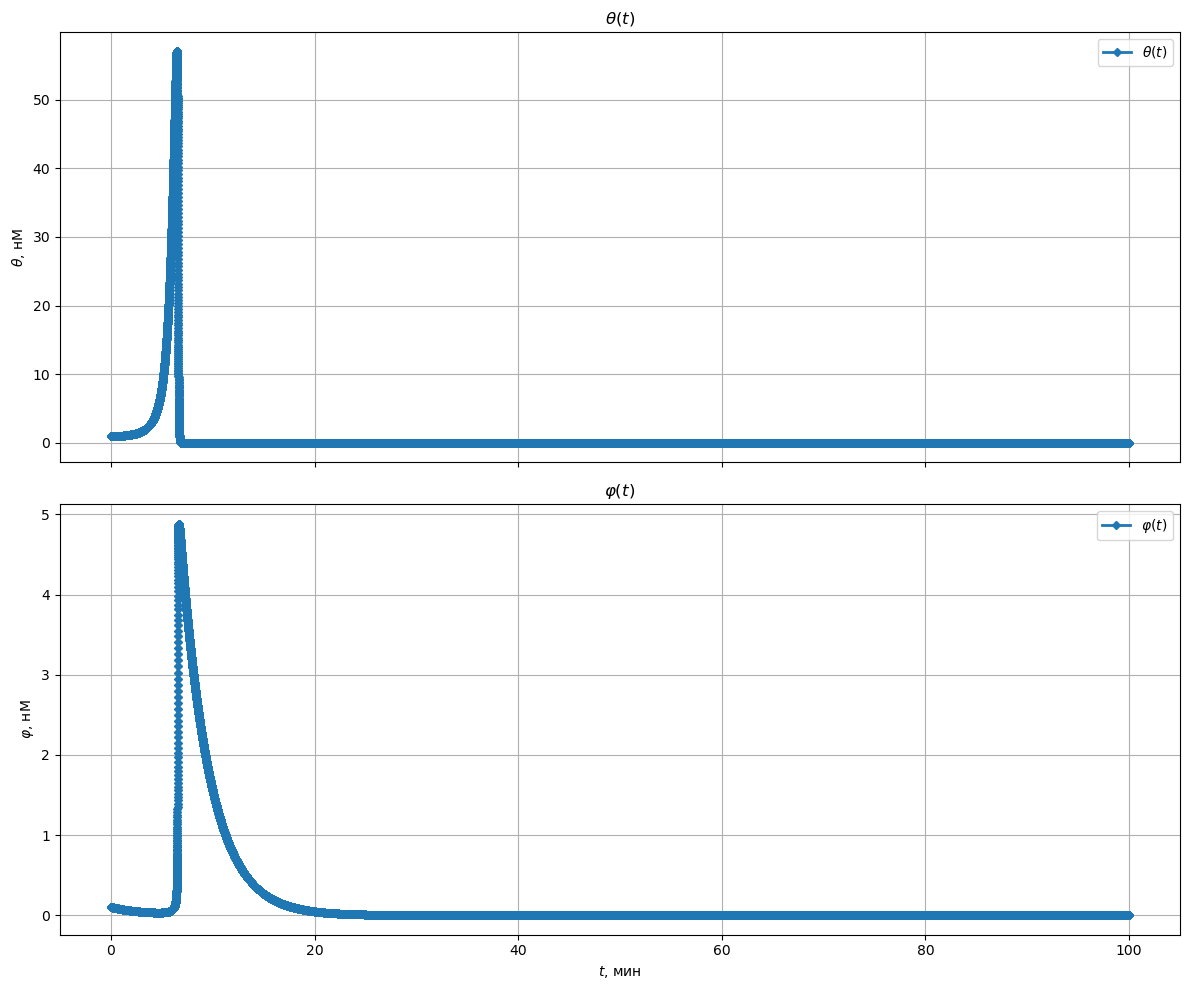

In [9]:
theta_initial = 1.0
phi_initial = 0.1
y0 = np.array([theta_initial, phi_initial])
t_span = [0, 100]
h = 1e-3

t_gl4, y_gl4 = solve_ode_gl4(ode_system, jacobian, t_span, y0, h)

fig, axs = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

# Plot theta
axs[0].plot(t_gl4, y_gl4[:, 0], label=r"$\theta (t)$", lw=2, marker='D', markersize=4, linestyle='-')
axs[0].set_ylabel(r'$\theta$, нМ')
axs[0].set_title(r'$\theta(t)$')
axs[0].legend()
axs[0].grid(True)

# Plot phi
axs[1].plot(t_gl4, y_gl4[:, 1], label=r"$\varphi (t)$".format(h), lw=2, marker='D', markersize=4, linestyle='-')
axs[1].set_xlabel(r'$t$, мин')
axs[1].set_ylabel(r'$\varphi$, нМ')
axs[1].set_title(r'$\varphi (t)$')
axs[1].legend()
axs[1].grid(True)

plt.tight_layout()
plt.show()

# Неявный метод Адамса 3 порядка

$y_{n+1} = y_n + h \left(\frac{5}{12} f(t_{n+1}, y_{n+1}) + \frac{8}{12} f(t_n, y_n) - \frac{1}{12} f(t_{n-1}, y_{n-1})\right)$

In [11]:
# The 4th order Runge-Kutta method for the start of the the implicit Adams
def rk4_step(f, t, y, h):
    k1 = h * f(t, y)
    k2 = h * f(t + 0.5*h, y + 0.5*k1)
    k3 = h * f(t + 0.5*h, y + 0.5*k2)
    k4 = h * f(t + h, y + k3)
    return y + (k1 + 2*k2 + 2*k3 + k4) / 6.0


def am3_corrector_residual(Y_guess, t_next, y_n, f_n, f_prev, h):
    f_next_guess = ode_system(t_next, Y_guess)
    residual = Y_guess - y_n - (h / 12.0) * (5 * f_next_guess + 8 * f_n - f_prev)
    return residual


def am3_corrector_jacobian(Y_guess, t_next, y_n, f_n, f_prev, h):
     J_f_next = jacobian(t_next, Y_guess)
     identity_matrix = np.identity(len(Y_guess))
     dG_dY = identity_matrix - (5.0 * h / 12.0) * J_f_next
     return dG_dY


def solve_ode_am3_fsolve(f, jac, t_span, y0, h):
    t_values = np.arange(t_span[0], t_span[1] + h, h)
    y_values = np.zeros((len(t_values), len(y0)))
    y_values[0, :] = y0

    if len(t_values) < 2: return t_values, y_values
    y_values[1, :] = rk4_step(f, t_values[0], y_values[0, :], h)

    f_history = np.zeros_like(y_values)
    f_history[0, :] = f(t_values[0], y_values[0, :])
    f_history[1, :] = f(t_values[1], y_values[1, :])

    num_fsolve_failures = 0
    for n in range(1, len(t_values) - 1):
        t_n = t_values[n]
        y_n = y_values[n, :]
        f_n = f_history[n, :]
        f_prev = f_history[n-1, :]
        t_next = t_values[n+1]

        initial_guess = y_n

        y_next, info, ier, mesg = fsolve(
            am3_corrector_residual,
            initial_guess,
            args=(t_next, y_n, f_n, f_prev, h),
            fprime=am3_corrector_jacobian,
            full_output=True
        )

        y_values[n+1, :] = y_next

        f_history[n+1, :] = f(t_next, y_next)

    return t_values, y_values

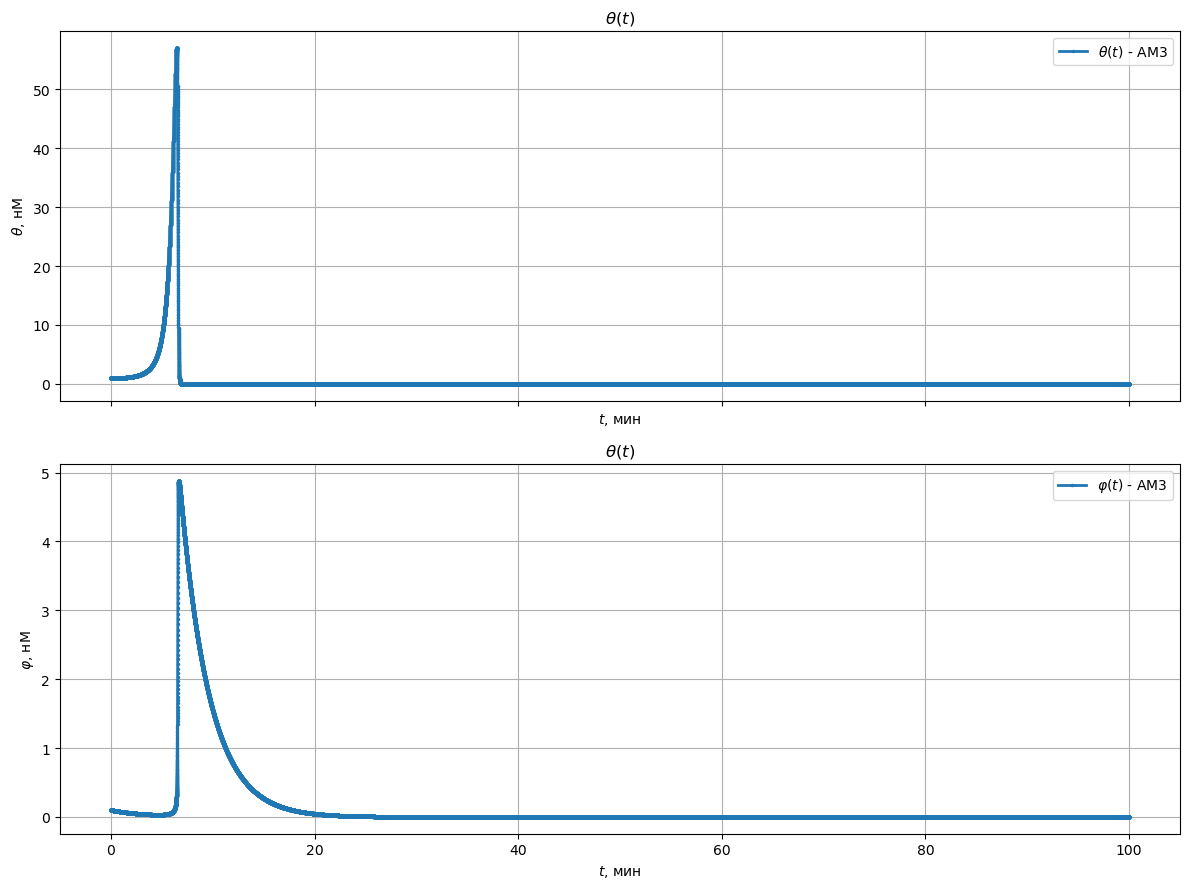

In [12]:
theta_initial = 1.0
phi_initial = 0.1
y0 = np.array([theta_initial, phi_initial])
t_span = [0, 100]
h = 1e-3

t_am3_fs, y_am3_fs = solve_ode_am3_fsolve(ode_system, jacobian, t_span, y0, h)

fig, axs = plt.subplots(2, 1, figsize=(12, 9), sharex=True)

# Plot theta
axs[0].plot(t_am3_fs, y_am3_fs[:, 0], label=r'$\theta (t)$ - AM3', lw=2, marker='.', markersize=3, linestyle='-')
axs[0].set_xlabel(r'$t$, мин')
axs[0].set_ylabel(r'$\theta$, нМ')
axs[0].set_title(r'$\theta (t)$')
axs[0].legend()
axs[0].grid(True)

# Plot phi
axs[1].plot(t_am3_fs, y_am3_fs[:, 1], label=r'$\varphi (t)$ - AM3', lw=2, marker='.', markersize=3, linestyle='-')
axs[1].set_xlabel(r'$t$, мин')
axs[1].set_ylabel(r'$\varphi$, нМ')
axs[1].set_title(r'$\theta (t)$')
axs[1].legend()
axs[1].grid(True)

plt.tight_layout()
plt.show()

# Методы Розенброка

$S$-стадийный метод Розенброка для решения автономной системы:

$$ k_i = \tau f \left(u_n + \sum^{i-1}_{j=1} \beta_{i, j} k_j \right) + \tau B \sum^{i}_{j=1} \mu_{i, j} k_j, \space i = 1, \dots, S, $$

$$ u^{n+1} = u^{n} + \sum^{S}_{k=1} \gamma_k k_k$$,

где $\beta$, $\gamma$, $\mu$ - управляющие коэффициенты метода, а $B$ - матрица Якоби правой части системы.

# Метод Розенброка 2 порядка

In [15]:
def solve_ode_ros2(f, jac, t_span, y0, h):
    t_values = np.arange(t_span[0], t_span[1] + h, h)
    y_values = np.zeros((len(t_values), len(y0)))
    y_values[0, :] = y0
    n_steps = len(t_values) - 1

    # Method parameters
    gamma_ros = 1.0 / (2.0 + np.sqrt(2.0))
    a21 = 1.0
    c2 = 1.0
    b1 = 0.0
    b2 = 1.0
    gamma21 = -gamma_ros

    identity = np.identity(len(y0))
    num_linalg_errors = 0

    for n in range(n_steps):
        t_n = t_values[n]
        y_n = y_values[n, :]

        J_n = jac(t_n, y_n)
        W = identity - h * gamma_ros * J_n

        # Stage 1
        f_n = f(t_n, y_n)
        k1 = solve(W, f_n)

        # Stage 2
        t_stage2 = t_n + c2 * h
        y_stage2 = y_n + h * a21 * k1
        f_stage2 = f(t_stage2, y_stage2)
        rhs_k2 = f_stage2 + h * gamma21 * (J_n @ k1)
        k2 = solve(W, rhs_k2)

        y_values[n + 1, :] = y_n + h * (b1 * k1 + b2 * k2)

    return t_values, y_values

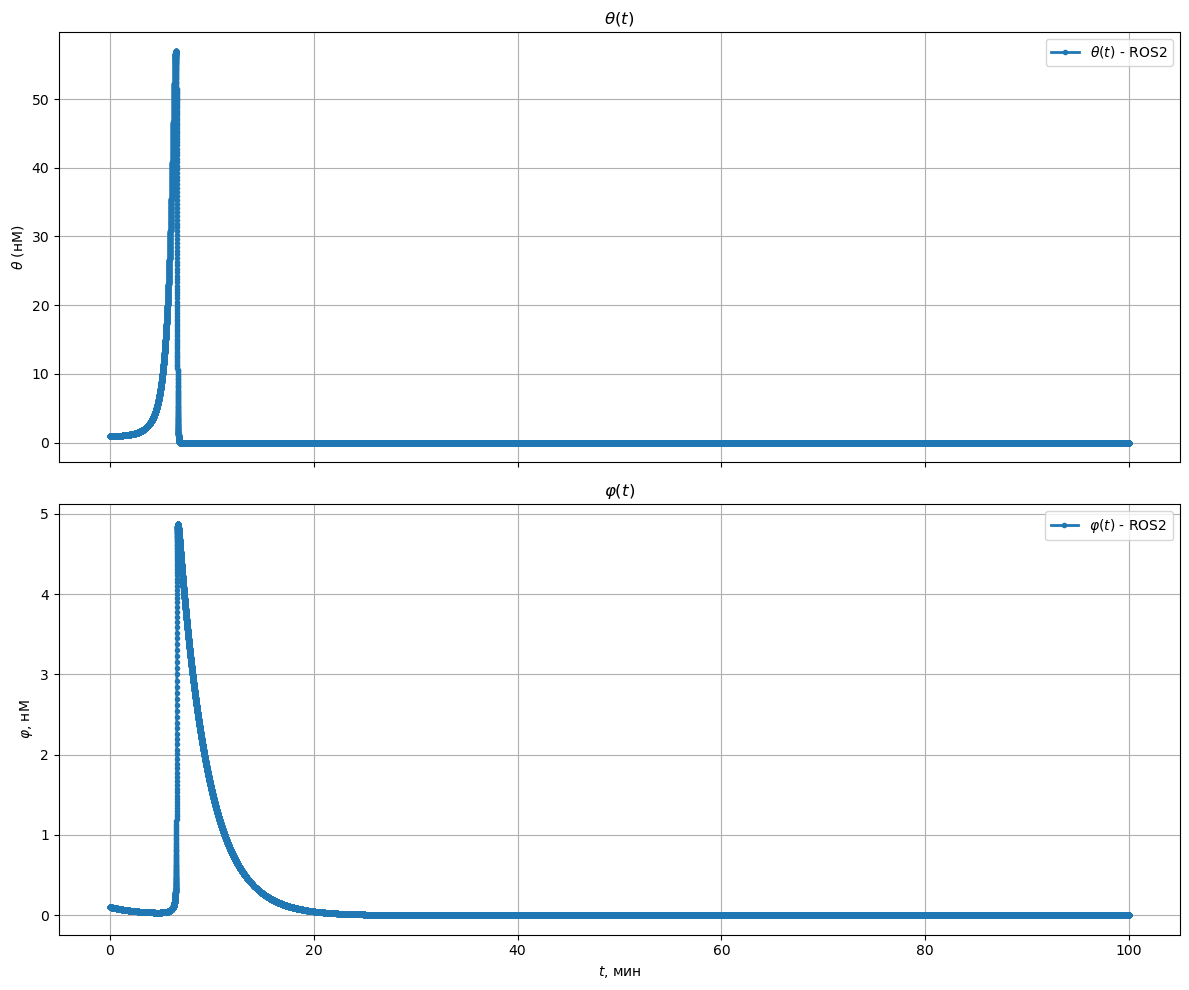

In [16]:
theta_initial = 1.0
phi_initial = 0.1
y0 = np.array([theta_initial, phi_initial])
t_span = [0, 100]
h = 1e-3

t_ros2, y_ros2 = solve_ode_ros2(ode_system, jacobian, t_span, y0, h)

fig, axs = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

# Plot theta
axs[0].plot(t_ros2, y_ros2[:, 0], label=r'$\theta (t)$ - ROS2', lw=2, marker='o', markersize=3, linestyle='-')
axs[0].set_ylabel(r'$\theta$ (нМ)')
axs[0].set_title(r'$\theta (t)$')
axs[0].legend()
axs[0].grid(True)

# Plot phi
axs[1].plot(t_ros2, y_ros2[:, 1], label=r'$\varphi (t)$ - ROS2', lw=2, marker='o', markersize=3, linestyle='-')
axs[1].set_xlabel(r'$t$, мин')
axs[1].set_ylabel(r'$\varphi$, нМ')
axs[1].set_title(r'$\varphi (t)$')
axs[1].legend()
axs[1].grid(True)

plt.tight_layout()
plt.show()

# Метод Розенброка 4 порядка

In [18]:
def solve_ode_ros4_grk4a(f, jac, t_span, y0, h):
    t_values = np.arange(t_span[0], t_span[1] + h, h)
    y_values = np.zeros((len(t_values), len(y0)))
    y_values[0, :] = y0
    n_steps = len(t_values) - 1

    # Method parameters
    gamma = 0.278028497542346
    a21 = gamma
    a31 = 0.170701478303049
    a32 = 0.275251064944753
    a41 = 0.310507728483432
    a42 = 1.12744977043363
    a43 = 0.228974753634449

    b1 = 0.155556569387680
    b2 = 0.419028973705921
    b3 = 0.225414456906399
    b4 = 0.2

    c21 = -0.278028497542346
    c31 = -0.161339695473130
    c32 = -0.275251064944753
    c41 = 0.496770392284244
    c42 = -1.68912119337738
    c43 = -0.228974753634449

    identity = np.identity(len(y0))
    num_linalg_errors = 0

    for n in range(n_steps):
        t_n = t_values[n]
        y_n = y_values[n, :]

        J_n = jac(t_n, y_n)
        W = identity - h * gamma * J_n

        # Stage 1
        f_n = f(t_n, y_n)
        k1 = solve(W, f_n, assume_a='gen')

        # Stage 2
        y_stage2 = y_n + h * a21 * k1
        f_stage2 = f(t_n, y_stage2)
        rhs_k2 = f_stage2 + h * (c21 * (J_n @ k1))
        k2 = solve(W, rhs_k2, assume_a='gen')

        # Stage 3
        y_stage3 = y_n + h * (a31 * k1 + a32 * k2)
        f_stage3 = f(t_n, y_stage3)
        rhs_k3 = f_stage3 + h * (c31 * (J_n @ k1) + c32 * (J_n @ k2))
        k3 = solve(W, rhs_k3, assume_a='gen')

        # Stage 4
        y_stage4 = y_n + h * (a41 * k1 + a42 * k2 + a43 * k3)
        f_stage4 = f(t_n, y_stage4)
        rhs_k4 = f_stage4 + h * (c41 * (J_n @ k1) + c42 * (J_n @ k2) + c43 * (J_n @ k3))
        k4 = solve(W, rhs_k4, assume_a='gen')

        y_values[n + 1, :] = y_n + h * (b1 * k1 + b2 * k2 + b3 * k3 + b4 * k4)

    return t_values, y_values


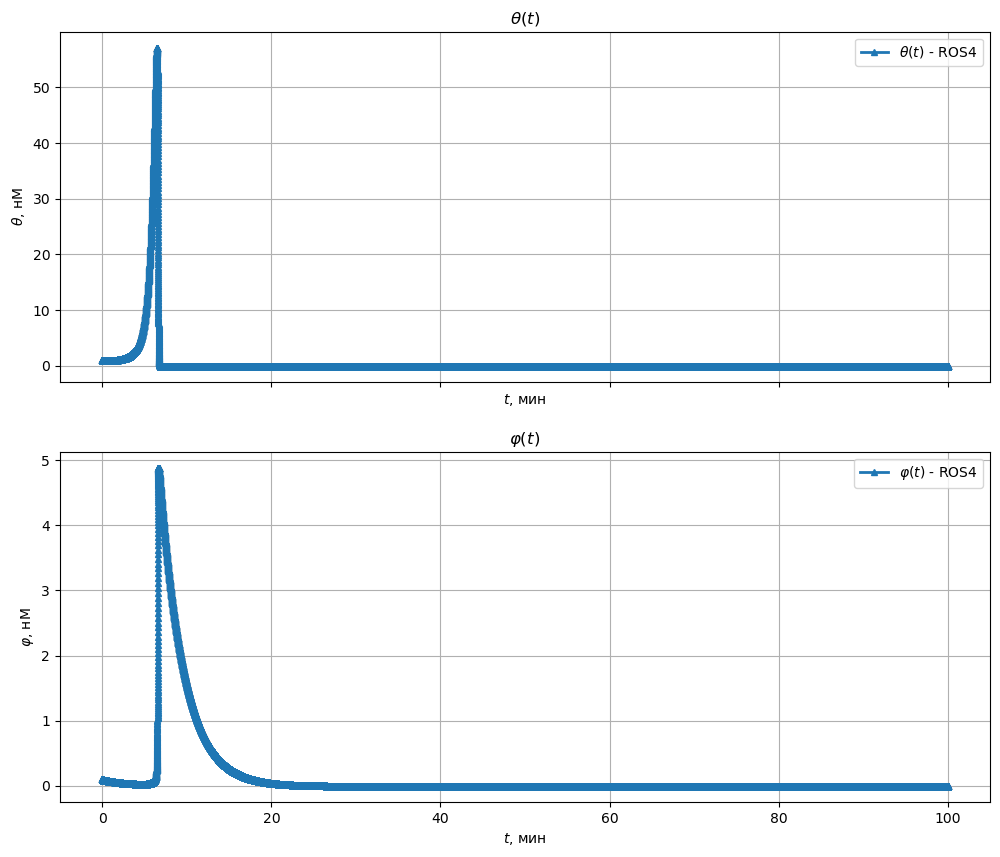

In [19]:
theta_initial = 1.0
phi_initial = 0.1
y0 = np.array([theta_initial, phi_initial])
t_span = [0, 100]
h = 1e-3

t_ros4, y_ros4 = solve_ode_ros4_grk4a(ode_system, jacobian, t_span, y0, h)

fig, axs = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

axs[0].plot(t_ros4, y_ros4[:, 0], label=r'$\theta (t)$ - ROS4', lw=2, marker='^', markersize=4, linestyle='-')
axs[0].set_xlabel(r'$t$, мин')
axs[0].set_ylabel(r'$\theta$, нМ')
axs[0].set_title(r'$\theta (t)$')
axs[0].legend()
axs[0].grid(True)

axs[1].plot(t_ros4, y_ros4[:, 1], label=r'$\varphi (t)$ - ROS4', lw=2, marker='^', markersize=4, linestyle='-')
axs[1].set_xlabel(r'$t$, мин')
axs[1].set_ylabel(r'$\varphi$, нМ')
axs[1].set_title(r'$\varphi (t)$')
axs[1].legend()
axs[1].grid(True)
